# 2048 Game
 
__A 2048 Games works in the following manner__

- Whenever the player presses a key all the blocks need to be moved into the direction specified in such a manner that any 2 blocks with same number combines to become a single block of double the value (i.e., two blocks of value 4 becomes one block of value 8)
- The movement of block is done until they can't move futher in the specified direction
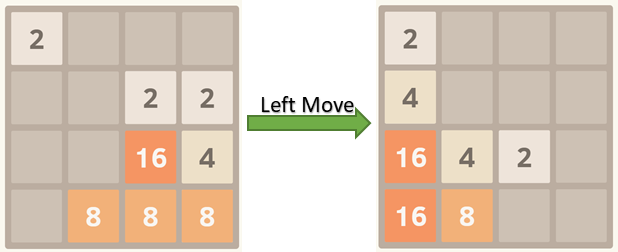

- There are total four moves which the games permit the player to use: Up, Down, Right, Left
- For every move their needs to be done many operations on the matrix 
- Their are the following operations that are needed to be performed to get result of each move made by the use: 
    1. Merging: this operation combines the blocks of same value to create a single block
    2. Compression: all the blank blocks are replaced by the blocks having value as shown in the figure
    3. Reverse: it is used to reverse a matrix so that the calculation can be done in the single direction for all the moves          without using any other logic
    4. Transpose: for making calculations for up and down moves to perform easy calculations
- For all the moves the the combination of all the moves need to be performed in the following manner:
    1. Up: 
        transpose
        compress
        merge
        compress
        transpose
           
    2. Down: 
        transpose
        reverse
        compress
        merge
        compress
        reverse
        transpose
             
    3. Left: 
         compress
         merge
         compress
              
    4. Right: 
         reverse
         compress
         merge
         compress
         reverse
             

In [4]:
from tkinter import * #tkinter is used for making the required console and the gui
from tkinter import messagebox #used for generating the messages for winning and lossing
import random #used for generating a random 2 or 4 in the empty blocks
import numpy as np # the numpy is used for quick matrix calculations
# The Board class is used for generating a nxn size board

class Board:
    #bg colour is used to set different colour for tiles of different numbers
    bg_color={

        "2": "red",
        "4": "green",
        "8": "blue",
        "16": "cyan",
        "32": "#655D8A",
        "64": "magenta",
        "128": "#1572A1",
        "256": "#9C0F48",
        "512": "#470D21",
        "1024": "#E60965",
        "2048": "#876445",
    }
    bestscore = 0 
    
    
    def __init__(self, n=4): # This function is used for creating the tkinter window pannel
        self.n = n # This value can be changed to change the difficulty of the game
        self.score = 0
        self.window = Tk() 
        self.window.title("Ather 2048 Game")
        self.gameArea = Canvas(self.window, bg = "#C7B198")
        self.board = []
        #Creating the array that will hold the values within the grid
        self.gridCell = np.array([[0 for i in range(self.n)]for i in range(self.n)]) 
        self.m = False
        self.moved = False
        self.score = 0
        
        for i in range(self.n):
            r = []
            for j in range(self.n):
                label = Label(self.gameArea, text = "", bg = "yellow",
                              font = ("Helvetica",22,"bold"),height = 2, width = 3)
                label.grid(row = i, column = j, padx = 5, pady = 5)
                r.append(label)
            self.board.append(r)
        self.gameArea.grid()
                              
    
    def reverse(self):
        """this function is used for reversing the matrix using numpy"""
        self.gridCell = np.flip(self.gridCell, axis = 1)

    def transpose(self):
        """this function is used for trnasposing the matrix i.e., changing rows into columns and columns into rows"""
        self.gridCell= np.transpose(self.gridCell)
    
    def compress(self):
        """this function is used for moving blocks coantining the value and get them left aligned in the matrix"""
        self.c = False
        for i in range(self.n):
            k = self.gridCell[i]
            k = k[k!=0]
            k = np.pad(k, (0,self.n-len(k)))
            if any(k!=self.gridCell[i]):
                self.c = True
            self.gridCell[i] = k
    
    def merge(self):
        """this function is used for merging two same value adjacent blocks into single block with twice the value"""
        self.m = False # this value is used to determine whether the merge operation is performed or not
        for i in range(self.n):
            for j in range(self.n-1):
                if self.gridCell[i][j] == self.gridCell[i][j+1] !=0:
                    self.gridCell[i][j] *= 2
                    self.score += self.gridCell[i][j]
                    self.gridCell[i][j+1] = 0
                    self.m = True # Shows that the merge operation is performed successfully
    def random_cell(self):
        """ this function is used to add a 2 or 4 value if the move is made randomly on to the available empty blocks"""
        index = []
        for i in range(self.n):
            for j in range(self.n):
                if self.gridCell[i][j] == 0:
                    index.append((i,j)) # all the set of index containing empty or zero value
        
        self.gridCell[random.choice(index)] = random.choice([2,4]) #Assigning a random 2 or 4 value to a random empty block
        
    def can_merge(self):
        """This function is used to check if the merge operations can be performed in case all the blocks are filled"""
        for i in range(self.n):
            for j in range(self.n-1):
                if self.gridCell[i][j] == self.gridCell[i][j+1]:
                    return True
        for i in range(self.n-1):
            for j in range(self.n):
                if self.gridCell[i+1][j] == self.gridCell[i][j]:
                    return True
        return False
    
    def paintGrid(self):
        """ This function is used to create the game pannel"""
        for i in range(self.n):
            for j in range(self.n):
                if self.gridCell[i][j] == 0:
                    self.board[i][j].config(text = "", bg = "white")
                else:
                    self.board[i][j].config(text = str(self.gridCell[i][j]),
                    bg = self.bg_color.get(str(self.gridCell[i][j])),
                    fg = "white")
                    
        
class Game:
    
    def __init__(self, board):
        self.board = board
        self.end = False # Checks if the board is completely filled and can't be updated further
        self.won = False # Checks if the user achieved the 2048 score
        self.n = 4 # The size of the grid
        self.st = False # The choice of the user to restart the game
        
    def start(self):
        """For starting the game"""
        self.board.random_cell()
        self.board.random_cell()
        self.board.paintGrid()
        self.board.window.bind('<Key>', self.link_keys)
        self.board.window.mainloop()
        
    def link_keys(self, event):
        """used to map the arrow keys to the code"""
        if self.end or self.won:
            return

        self.board.c = False # check if the compression operation was performed
        self.board.m = False # check if the merge opertation was performed or not
        self.board.moved = False # check if any move was successfully made in the game or not
        
        pressed_key = event.keysym
        
        if pressed_key == "Up":
            """Perform the neccessary operations in case the player makes a Up move"""
            self.board.transpose()
            self.board.compress()
            self.board.merge()
            self.board.moved = self.board.c or self.board.m
            self.board.compress()
            self.board.transpose()
        elif pressed_key == "Down":
            """Perform the neccessary operations in case the player makes a Down move"""
            self.board.transpose()
            self.board.reverse()
            self.board.compress()
            self.board.merge()
            self.board.moved = self.board.c or self.board.m
            self.board.compress()
            self.board.reverse()
            self.board.transpose()
        elif pressed_key == "Left":
            """Perform the neccessary operations in case the player makes a Left move"""
            self.board.compress()
            self.board.merge()
            self.board.moved = self.board.c or self.board.m
            self.board.compress()
        elif pressed_key == "Right":
            """Perform the neccessary operations in case the player makes a Right move"""
            self.board.reverse()
            self.board.compress()
            self.board.merge()
            self.board.moved = self.board.c or self.board.m
            self.board.compress()
            self.board.reverse()
        else:
            """Does nothing is any other key was pressed"""
            pass
        self.board.paintGrid()
        # Checking if the 2048 goal was achieved
        for i in range(self.n):
            for j in range(self.n):
                if (self.board.gridCell[i][j]==2048): # The maximum target of the game can be changed
                    self.won = True
                    messagebox.showinfo("2048", message = "YOU WIN\nTotal Score :{}".format(self.board.score))
        flag = False # A flag to check if the board has any empty space
        for i in range(self.n):
            for j in range(self.n):
                if self.board.gridCell[i][j] == 0:
                    flag = True
        # Checks if the board is completely filled and no other operation can be performed
        if self.board.can_merge() == False and flag == False:
            self.end = True
            # A messagebox to know if the player wants to continue playing or not
            messagebox.showinfo("2048", message = "YOU LOST\n Total Score :{}".format(self.board.score))
            MsgBox = messagebox.askquestion("2048", "Want to play a new game?")
            if MsgBox == "yes":
                self.st = True
                self.board.window.destroy() # Destroying the window at the end of the game
                return
            else:
                self.st = False
                self.board.window.destroy() # Destroying the window at the end of the game
                return
        if self.board.moved: # Adding a new random value on the grid if a valid move was made
            self.board.random_cell() 
        
        self.board.paintGrid() # Repainting or remaking the grid as per the changes done in the block values
                
        

if __name__ == "__main__":
    def main():
        """This main function starts the main game"""
        board = Board()
        game2048 = Game(board)
        game2048.start()
        if game2048.st == True:
            # Used to restart the game as per the users choice
            main()
        return
    main() # the exuction of the code starts from here
